In [26]:
from keras import models, layers

In [27]:
import keras as k
print(k.__version__)

2.1.6


In [28]:
## load reuters data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [29]:
## peek at train data shape
print(train_data.shape)
print("---"*20)
print(train_data[0])
print("---"*20)
print(train_labels[:10])

(8982,)
------------------------------------------------------------
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
------------------------------------------------------------
[ 3  4  3  4  4  4  4  3  3 16]


In [30]:
## peek at test data shape
print(test_data.shape)
print("---"*20)
print(test_data[0])
print("---"*20)
print(test_labels[:10])

(2246,)
------------------------------------------------------------
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
------------------------------------------------------------
[ 3 10  1  4  4  3  3  3  3  3]


In [31]:
## encode the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results    

In [32]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [33]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [34]:
## function to print numpy arrays as table --> use pandas instead
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [35]:
import pandas as pd
df = pd.DataFrame(one_hot_train_labels[:10])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
## build model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [37]:
## compile the model
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
from keras import optimizers
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

In [42]:
## set aside a validation set -> first 10000 samples
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [43]:
## train model
history = model.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=20, 
    batch_size=512, 
    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 269us/step - loss: 2.5322 - categorical_accuracy: 0.4955 - val_loss: 1.7208 - val_categorical_accuracy: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.4452 - categorical_accuracy: 0.6879 - val_loss: 1.3459 - val_categorical_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.0953 - categorical_accuracy: 0.7651 - val_loss: 1.1708 - val_categorical_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.8697 - categorical_accuracy: 0.8165 - val_loss: 1.0793 - val_categorical_accuracy: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.7034 - categorical_accuracy: 0.8472 - val_loss: 0.9844 - val_categorical_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.5667 - categorical_accuracy

In [50]:
## look at the history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

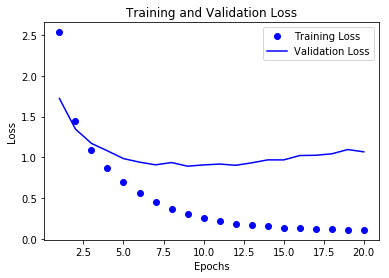

In [52]:
## plot training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
training_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(training_loss_values) + 1)

plt.plot(epochs, training_loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

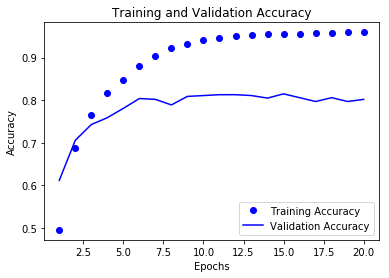

In [54]:
## plot training and validation accuracy
plt.clf()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
## retrain model for 9 epochs
## build model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

## train model
history = model.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=9, 
    batch_size=512, 
    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 104us/step - loss: 2.5398 - categorical_accuracy: 0.5226 - val_loss: 1.6733 - val_categorical_accuracy: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.3712 - categorical_accuracy: 0.7121 - val_loss: 1.2758 - val_categorical_accuracy: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.0136 - categorical_accuracy: 0.7781 - val_loss: 1.1303 - val_categorical_accuracy: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.7976 - categorical_accuracy: 0.8251 - val_loss: 1.0539 - val_categorical_accuracy: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.6393 - categorical_accuracy: 0.8624 - val_loss: 0.9754 - val_categorical_accuracy: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.5124 - categorical_accuracy: 0.89

In [57]:
## evaluate model
results = model.evaluate(X_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 76us/step


[1.0224983186883154, 0.7756010686194165]

In [58]:
## predictions
predictions = model.predict(X_test)

In [60]:
predictions[0].shape

(46,)

In [61]:
## class of prediction
np.argmax(predictions[0])

3

In [62]:
test_labels[0]

3